In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import pandas as pd
sns.set_style('darkgrid')

In [2]:
dataset_path = '../augmenting_nlms_meco_data/joint_data_trimmed.csv'

In [3]:
df = pd.read_csv(dataset_path, index_col=0)

In [4]:
df.head()

,subid,trialid,itemid,cond,sentnum,ianum,ia,blink,skip,nrun,...,singlefix.sac.in,singlefix.sac.out,singlefix.launch,singlefix.land,singlefix.cland,singlefix.dur,lang,trial,supplementary_id,uniform_id
1,du_01,1.0,1.0,1.0,1.0,1.0,Janus,1.0,0.0,2.0,...,NaN,15.0,NaN,0.0,-3.0,154.0,du,NaN,DU_01,du_1
2,du_01,1.0,1.0,1.0,1.0,2.0,is,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,du,NaN,DU_01,du_1
3,du_01,1.0,1.0,1.0,1.0,3.0,in,0.0,0.0,1.0,...,7.0,6.0,6.0,1.0,-0.5,551.0,du,NaN,DU_01,du_1
4,du_01,1.0,1.0,1.0,1.0,4.0,de,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,du,NaN,DU_01,du_1
5,du_01,1.0,1.0,1.0,1.0,5.0,oude,1.0,0.0,2.0,...,15.0,-13.0,14.0,1.0,-1.5,189.0,du,NaN,DU_01,du_1


In [5]:
gaze_features = ['dur', 'firstfix.dur', 'firstrun.dur', 'firstrun.nfix', 'nfix'] #["skip", "firstfix.dur", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "refix", "reread"]
other_features = ["trialid", "sentnum", "ianum", "ia", "lang", "uniform_id"]
df = df[other_features + gaze_features]

In [6]:
df.head()

,trialid,sentnum,ianum,ia,lang,uniform_id,dur,firstfix.dur,firstrun.dur,firstrun.nfix,nfix
1,1.0,1.0,1.0,Janus,du,du_1,400.0,154.0,154.0,1.0,2.0
2,1.0,1.0,2.0,is,du,du_1,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,3.0,in,du,du_1,551.0,551.0,551.0,1.0,1.0
4,1.0,1.0,4.0,de,du,du_1,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,5.0,oude,du,du_1,439.0,189.0,189.0,1.0,2.0


# English

In [7]:
en_df = df[df['lang'] == 'en']

In [8]:
en_stats_df = pd.DataFrame(columns = gaze_features)

In [10]:
all_en_df = en_df.copy()
all_en_df['uniform_id'] = 'global'
en_df = pd.concat([en_df, all_en_df], ignore_index=True)

In [11]:
en_users = [6, 49, 57, 83, 98]
en_users = [f'en_{user}' for user in en_users] + ['global']

In [12]:
for user in en_users:
    user_df = en_df[en_df['uniform_id'] == user]
    user_mean = user_df[gaze_features].mean()
    user_std = user_df[gaze_features].std()
    en_stats_df.loc[f'{user}_mean'] = user_mean
    en_stats_df.loc[f'{user}_std'] = user_std
# en_stats_df.loc['all_mean'] = en_df[gaze_features].mean()
# en_stats_df.loc['all_std'] = en_df[gaze_features].std()

In [13]:
sorted_cols = ['dur', 'firstfix.dur', 'firstrun.dur', 'firstrun.nfix', 'nfix']#, 'refix', 'reread', 'skip']

In [14]:
en_stats_df[sorted_cols]

,dur,firstfix.dur,firstrun.dur,firstrun.nfix,nfix
en_6_mean,408.794872,186.910569,240.859912,1.304565,2.247029
en_6_std,311.159943,97.811005,153.756424,0.580598,1.574480
en_49_mean,320.335252,210.985612,252.392806,1.187050,1.497842
en_49_std,226.026097,87.682587,137.692740,0.470580,0.827958
en_57_mean,425.475550,231.377751,290.734719,1.262836,1.872861
en_57_std,361.622185,93.614671,182.553744,0.686012,1.566470
en_83_mean,250.767273,191.270545,209.077818,1.093091,1.298909
en_83_std,144.017945,62.637153,98.812022,0.337044,0.636212
en_98_mean,368.672800,212.836688,249.998850,1.198965,1.797010
en_98_std,259.375117,85.606721,138.233871,0.469531,1.141674


# Italian

In [15]:
it_df = df[df['lang'] == 'it']

In [16]:
it_stats_df = pd.DataFrame(columns = gaze_features)

In [17]:
all_it_df = it_df.copy()
all_it_df['uniform_id'] = 'global'
it_df = pd.concat([it_df, all_it_df], ignore_index=True)

In [18]:
it_users = [1, 26, 38, 43, 44]
it_users = [f'it_{user}' for user in it_users] + ['global']

In [19]:
for user in it_users:
    user_df = it_df[it_df['uniform_id'] == user]
    user_mean = user_df[gaze_features].mean()
    user_std = user_df[gaze_features].std()
    it_stats_df.loc[f'{user}_mean'] = user_mean
    it_stats_df.loc[f'{user}_std'] = user_std
# it_stats_df.loc['all_mean'] = it_df[gaze_features].mean()
# it_stats_df.loc['all_std'] = it_df[gaze_features].std()

In [20]:
it_stats_df[sorted_cols]

,dur,firstfix.dur,firstrun.dur,firstrun.nfix,nfix
it_1_mean,459.660365,212.031735,289.543552,1.380149,2.205267
it_1_std,369.822701,98.785967,194.637503,0.760057,1.657416
it_26_mean,368.071520,211.054917,277.809068,1.321839,1.754151
it_26_std,289.936567,84.282248,192.767151,0.829101,1.251286
it_38_mean,662.205512,251.129134,301.362992,1.227559,2.800000
it_38_std,507.174659,114.859063,169.493938,0.545225,1.978848
it_43_mean,312.691066,219.748116,249.038751,1.158235,1.482239
it_43_std,188.403354,77.911567,123.066970,0.417478,0.805395
it_44_mean,512.108319,222.307626,259.973137,1.205373,2.407279
it_44_std,412.227997,85.401129,129.632840,0.489550,1.850571


# Plot

In [21]:
en_df.loc[:, gaze_features] =  (en_df[gaze_features] - en_df[gaze_features].min()) / (en_df[gaze_features].max() - en_df[gaze_features].min())
melted_en_df = pd.melt(en_df, id_vars=['uniform_id'], value_vars=gaze_features, var_name='feature', value_name='value')
melted_en_df = melted_en_df.sort_values('feature')
overall_mean_variance_en = melted_en_df.groupby('feature')['value'].agg(['mean', 'var']).reset_index()
melted_en_df = melted_en_df[melted_en_df['uniform_id'].isin(en_users)]

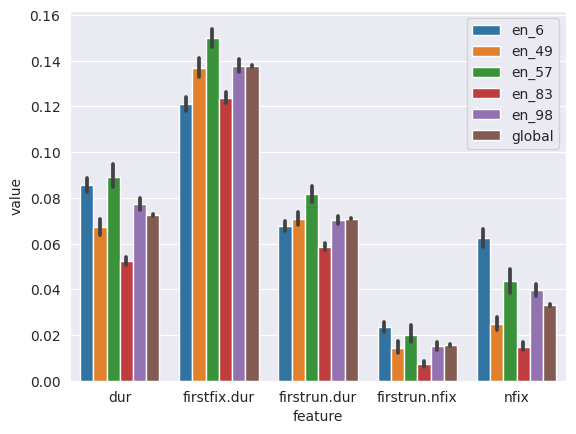

In [31]:
# sns.lineplot(data=melted_en_df, x='feature', y='value', hue='uniform_id');
sns.barplot(data=melted_en_df, x='feature', y='value', hue='uniform_id', hue_order=en_users)
plt.legend(loc='upper right')
# plt.xticks(rotation=20)
plt.show()

In [28]:
it_df.loc[:, gaze_features] =  (it_df[gaze_features] - it_df[gaze_features].min()) / (it_df[gaze_features].max() - it_df[gaze_features].min())
melted_it_df = pd.melt(it_df, id_vars=['uniform_id'], value_vars=gaze_features, var_name='feature', value_name='value')
melted_it_df = melted_it_df.sort_values('feature')
overall_mean_variance_it = melted_it_df.groupby('feature')['value'].agg(['mean', 'var']).reset_index()
melted_it_df = melted_it_df[melted_it_df['uniform_id'].isin(it_users)]

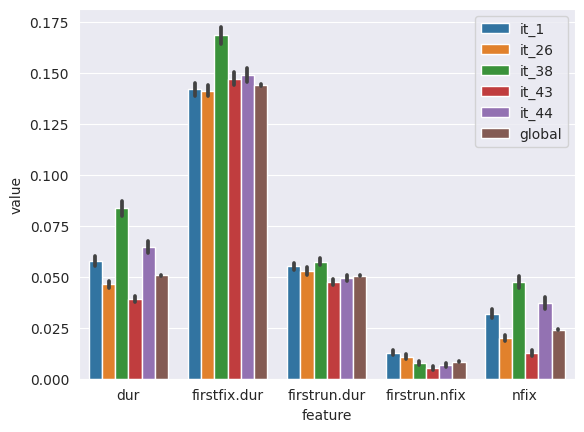

In [33]:
sns.barplot(data=melted_it_df, x='feature', y='value', hue='uniform_id', hue_order=it_users);
plt.legend(loc='upper right')
# plt.xticks(rotation=20)
plt.show()